In [1]:
import sys
sys.path.append(sys.path[0] + '/deepkexpfam')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from utils import save_object, load_object
from utils import make_grid_data, plot_object2D, plot_outrange, flow_density, object_density, find_outrange
from flows import Flow

from Datasets import Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring

%matplotlib inline

In [3]:
save_path = './saved_flows/'
ensembles = 50

names = ['Funnel', 'Banana', 'Ring', 'Uniform', 'Cosine', 'Grid', 'Multiring']
objs = [Funnel(), Banana(), Ring(), Uniform(), Cosine(), Grid(), Multiring()]

n_x, n_y = 500, 500
x_interval, y_interval = np.linspace(-7, 7, n_x), np.linspace(-7, 7, n_y)
grid_x, grid_y, X = make_grid_data(x_interval, y_interval)

In [4]:
# Load all flow models from files

# flows_dict = {}
# for name in names:
#     flow_ensemble = []
#     for j in range(ensembles):
#         flow = load_object(save_path+name+str(j))
#         flow_ensemble.append(flow)
#     flows_dict[name] = flow_ensemble


# compute and save/load density for all flows

# pX_dict = {}
# for name in names:
#     pX_ensemble = np.zeros((len(flow_ensemble), len(x_interval), len(y_interval)))
#     flow_ensemble = flows_dict[name]
#     for i, flow in enumerate(flow_ensemble):
#         pX_ensemble[i, :, :] = flow_density(flow, X).reshape(len(x_interval), len(y_interval))
#         print(name + str(i))
#     pX_dict[name] = pX_ensemble

# save_object(pX_dict, save_path + 'pX_dict_ensemble')

pX_dict = load_object(save_path + 'pX_dict_ensemble')

In [5]:
# Precompute object densities
pX_objs = []
for i in range(len(names)):
    obj = objs[i]
    name = names[i]
    
    pX_obj = object_density(obj, X).reshape(n_x, n_y)
    pX_objs.append(pX_obj)
    
    print(name)

Funnel
Banana
Ring
Uniform
Cosine
Grid
Multiring


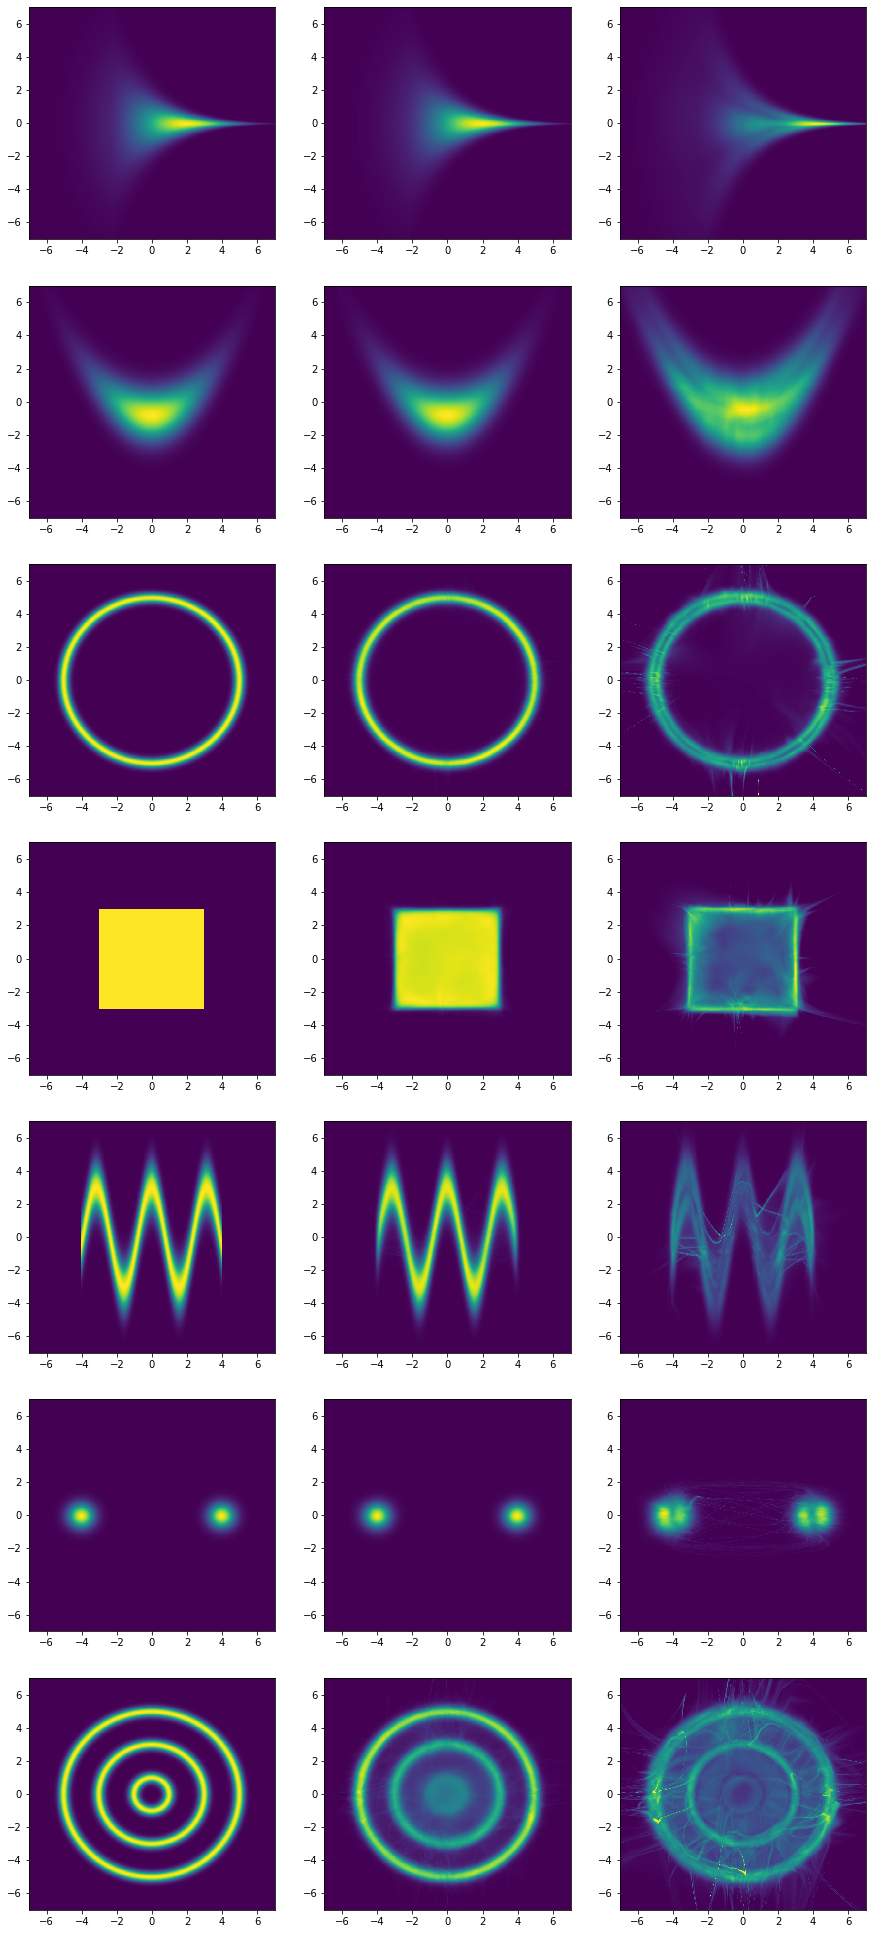

In [6]:
# plot mean and standard deviation
plt.figure(figsize=(15,35))
for i in range(len(names)):
    pX_obj = pX_objs[i]
    name = names[i]
    
    pX_iters = pX_dict[name]
    pX_mean = pX_iters.mean(axis=0)
    pX_std = pX_iters.std(axis=0)
    
    if name == 'Multiring':
        # clip large value
        max_val = 0.1 * pX_std.max()
        idx = pX_std > max_val
        pX_std[idx] = max_val
    
    if name == 'Ring':
        # clip large value
        max_val = 0.2 * pX_std.max()
        idx = pX_std > max_val
        pX_std[idx] = max_val
    
    plt.subplot(7, 3, 3*i+1)
    plt.pcolormesh(grid_x, grid_y, pX_obj, shading='auto')
    plt.subplot(7, 3, 3*i+2)
    plt.pcolormesh(grid_x, grid_y, pX_mean, shading='auto')
    plt.subplot(7, 3, 3*i+3)
    plt.pcolormesh(grid_x, grid_y, pX_std, shading='auto')

overall std = 0.0012


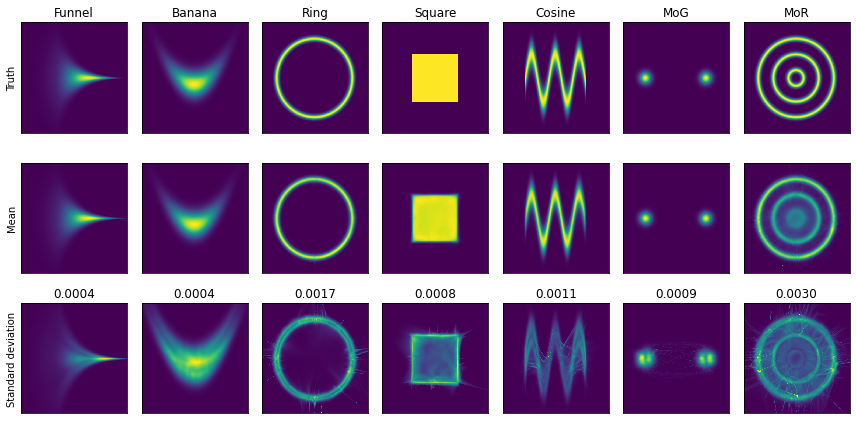

In [7]:
# plot mean and standard deviation
plot_names = ['Funnel', 'Banana', 'Ring', 'Square', 'Cosine', 'MoG', 'MoR']

plt.figure(figsize=(12, 6))
for i in range(len(names)):
    pX_obj = pX_objs[i]
    name = names[i]
    plot_name = plot_names[i]
    
    pX_iters = pX_dict[name]
    pX_mean = pX_iters.mean(axis=0)
    pX_std = pX_iters.std(axis=0)
    
    # clip large value
    if name == 'Multiring':
        # clip large value
        max_val = 0.1 * pX_std.max()
        idx = pX_std > max_val
        pX_std[idx] = max_val
    
    if name == 'Ring':
        # clip large value
        max_val = 0.2 * pX_std.max()
        idx = pX_std > max_val
        pX_std[idx] = max_val
    
    plt.subplot(3, 7, i+1)
    plt.pcolormesh(grid_x, grid_y, pX_obj, shading='auto')
    plt.title(plot_name)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Truth')
    
    plt.subplot(3, 7, i+8)
    plt.pcolormesh(grid_x, grid_y, pX_mean, shading='auto')
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Mean')
    
    plt.subplot(3, 7, i+15)
    plt.title('%.4f' % pX_std.mean())
    plt.pcolormesh(grid_x, grid_y, pX_std, shading='auto')
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Standard deviation')

plt.tight_layout()

overall_std = []
for i in range(len(names)):
    name = names[i]
    pX_iters = pX_dict[name]
    std = pX_iters.std(axis=0).mean()
    overall_std.append(std)
print('overall std = %.4f' % np.mean(overall_std))

In [8]:
# KL divergence of true and predictive distributions

# def kl_div(p, q, x_interval, y_interval):
#     eps = 0
#     n_x, n_y = p.shape
    
#     width = x_interval[-1] - x_interval[0]
#     height = y_interval[-1] - y_interval[0]
    
#     I = p * np.log(p/q)
#     I[np.isnan(I)] = 0.
    
#     kl = (width/(n_x-1)) * (height/(n_y-1)) * I.sum()
    
#     return kl

# for i in range(len(names)):
#     pX_obj = pX_objs[i]
#     name = names[i]
    
#     pX_iters = pX_dict[name]
#     pX_mean = pX_iters.mean(axis=0)
    
#     kl = kl_div(pX_mean, pX_obj, x_interval, y_interval)
#     print(name + ' %.6f' % kl)


In [9]:
# Precompute outranges for all objects
conf_intervals = [10, 50, 90]

pX_outranges_dict = {}
for i in range(len(names)):
    name = names[i]
    
    pX_obj = pX_objs[i]
    pX_iters = pX_dict[name]
    
    pX_outranges = []
    for conf_interval in conf_intervals:
        pX_outrange = find_outrange(pX_obj, pX_iters, conf_interval)
        pX_outranges.append(pX_outrange)
    
    pX_outranges_dict[name] = pX_outranges
    
    print(name)

Funnel
Banana
Ring
Uniform
Cosine
Grid
Multiring


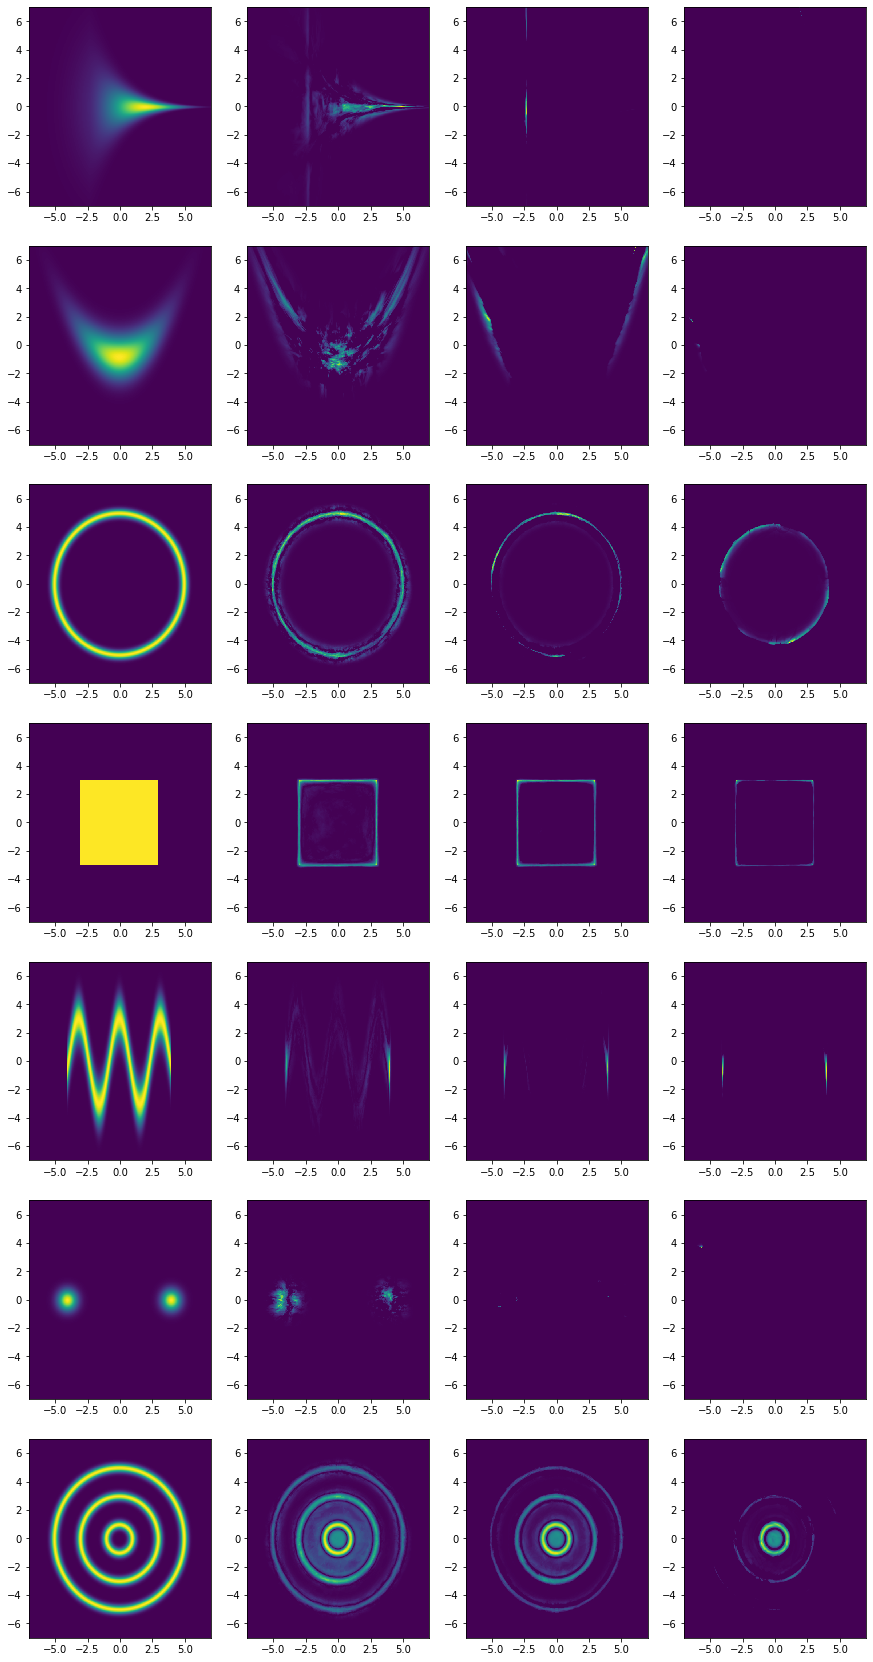

In [10]:
# Plot confidence interval
plt.figure(figsize=(15,30))
for i in range(len(names)):
    name = names[i]
    
    obj = objs[i]
    pX_obj = pX_objs[i]
    
    pX_iters = pX_dict[name]
    pX_outranges = pX_outranges_dict[name]
    
    plt.subplot(7, 4, 4*i+1)
    plt.pcolormesh(grid_x, grid_y, pX_obj, shading='auto')
    
    plt.subplot(7, 4, 4*i+2)
    plt.pcolormesh(grid_x, grid_y, pX_outranges[0], shading='auto')
    plt.subplot(7, 4, 4*i+3)
    plt.pcolormesh(grid_x, grid_y, pX_outranges[1], shading='auto')
    plt.subplot(7, 4, 4*i+4)
    plt.pcolormesh(grid_x, grid_y, pX_outranges[2], shading='auto')

In [11]:
table = {}
for i in range(len(names)):
    name = names[i]
    pX_outranges = pX_outranges_dict[name]
    means = []
    for j in range(len(conf_intervals)):
        means.append(pX_outranges[j].mean())
    table[name] = means


print('\t\t', end='')
for conf_interval in conf_intervals:
    print(str(conf_interval) + '%', end='\t')

print('')

for name in names:
    print(name, end='    ')
    for mean in table[name]:
        print('\t%2.2f' % (mean*1e6), end='')
    
    print('')
    
print('\nAverage deviation from confidence interval * 1e6')

		10%	50%	90%	
Funnel    	30.00	0.31	0.00
Banana    	17.68	0.07	0.00
Ring    	250.76	32.64	0.39
Uniform    	267.82	129.84	25.62
Cosine    	221.31	60.95	24.10
Grid    	96.68	0.17	0.00
Multiring    	1746.12	854.11	226.90

Average deviation from confidence interval * 1e6


In [12]:
table = {}
for i in range(len(names)):
    name = names[i]
    pX_outranges = pX_outranges_dict[name]
    means = []
    for j in range(len(conf_intervals)):
        means.append(np.mean(pX_outranges[j] == 0.))
    table[name] = means


print('\t\t', end='')
for conf_interval in conf_intervals:
    print(str(conf_interval) + '%', end='\t')

print('')

for name in names:
    print(name, end='    ')
    for mean in table[name]:
        print('\t%2.2f' % (mean), end='')
    
    print('')

print('')
    
print('Overall', end='    ')

for i in range(len(conf_intervals)):
    column = []
    for name in table:
        column.append(table[name][i])
    print('\t%2.2f' % (np.mean(column)), end='')

print('')
    
print('\npercentage of pixels inside confidence interval')

		10%	50%	90%	
Funnel    	0.46	0.87	0.93
Banana    	0.27	0.67	0.95
Ring    	0.13	0.58	0.71
Uniform    	0.83	0.94	0.97
Cosine    	0.50	0.92	0.97
Grid    	0.13	0.52	0.99
Multiring    	0.14	0.55	0.87

Overall    	0.35	0.72	0.91

percentage of pixels inside confidence interval
